<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Student: Nicolas Rehbach
* Matriculation Number: 11133387
* Date:   25.10.2022

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
import numpy as np
from numpy.random import randn
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

The output of the below code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

In [2]:
# hyperparameters
minPts = 2
eps = 3

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(random_data)

list(clusters).count(-1)

94

# Loading kaggle Datasets

In [3]:
diabetes_df = pd.read_csv('./data/diabetes.csv')
height_df = pd.read_csv('./data/Height of Male and Female by Country 2022.csv')
weight_df = pd.read_csv('./data/SOCR-HeightWeight.csv')

diabetes_df = diabetes_df.dropna()
height_df = height_df.dropna()
weight_df = weight_df.dropna()

## Dataframe 1

In [4]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot: xlabel='Age', ylabel='BMI'>

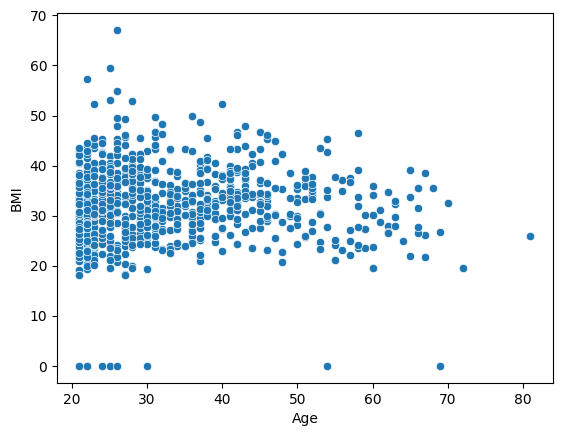

In [5]:
age_bmi = diabetes_df[['Age', 'BMI']]
sns.scatterplot(data = age_bmi, x = 'Age', y = 'BMI')

**Using the default hyperparameters**

In [6]:
minPits = 2
eps = 3
outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

age_bmi_clusters = outlier_detection.fit_predict(age_bmi)
list(age_bmi_clusters).count(-1)

13

Using the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) (mean intra-cluster distance and the mean nearest-cluster distance for each sample) to compute the epsilon.

"The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar."

In [7]:
def silhouette_func(df):
    # defining an array with possible epsilon values
    eps_arr = []
    for i in range(2,20):
        eps_arr.append(i)
    # loop through the array and for each epsilon, compute the average silhouette score. (b - a) / max(a, b)
    try:
        for i in eps_arr:
            print("eps vaulue:"+str(i))
            db = DBSCAN(eps = i, min_samples=5).fit(df)
            labels = db.labels_
            silhouette_avg = silhouette_score(df, labels)
            print("For eps value ="+str(i), "The average silhouette score is:",silhouette_avg)
    except:
        print("Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive) Error thrown")

In [8]:
silhouette_func(age_bmi)

eps vaulue:2
For eps value =2 The average silhouette score is: 0.21747476759966786
eps vaulue:3
For eps value =3 The average silhouette score is: 0.4305458636757951
eps vaulue:4
For eps value =4 The average silhouette score is: 0.4364061364369715
eps vaulue:5
For eps value =5 The average silhouette score is: 0.4568395806184668
eps vaulue:6
For eps value =6 The average silhouette score is: 0.5058155866626716
eps vaulue:7
For eps value =7 The average silhouette score is: 0.5058155866626716
eps vaulue:8
For eps value =8 The average silhouette score is: 0.4945598176848631
eps vaulue:9
For eps value =9 The average silhouette score is: 0.4945598176848631
eps vaulue:10
For eps value =10 The average silhouette score is: 0.4945598176848631
eps vaulue:11
For eps value =11 The average silhouette score is: 0.5006482392760847
eps vaulue:12
For eps value =12 The average silhouette score is: 0.5006482392760847
eps vaulue:13
For eps value =13 The average silhouette score is: 0.5006482392760847
eps vau

Here, several values should be taken into account. While 19 has the highest score of 0.6, the outliers are getting less precise (e.g. BMI of 0 is not a outlier anymore) due to the high radius.

In [32]:
minPits = 3 # Ideal minPits are dimensions +1 or *2 according to the article
eps = 6
outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

age_bmi_clusters = outlier_detection.fit_predict(age_bmi)
list(age_bmi_clusters).count(-1)

4

/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60500/4115281482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_bmi_outliers['outlier'] = age_bmi_clusters.tolist()
/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60500/4115281482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_bmi_outliers['outlier'][i] = 1


<AxesSubplot: xlabel='Age', ylabel='BMI'>

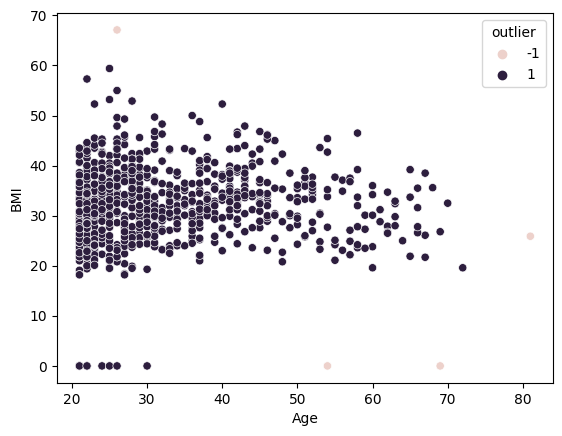

In [33]:
age_bmi_outliers = age_bmi
age_bmi_outliers['outlier'] = age_bmi_clusters.tolist()
#adding a loop to determine only the outliers but not several clusters
for i in range(0, len(age_bmi_outliers['outlier'])):
    if age_bmi_outliers['outlier'][i] != -1:
               age_bmi_outliers['outlier'][i] = 1
sns.scatterplot(data = age_bmi_outliers, x = 'Age', y = 'BMI', hue = 'outlier')

Dropping BMI = 0 values, which would have happend with correct data preperation.

In [34]:
age_bmi_outliers = age_bmi_outliers[age_bmi_outliers['BMI'] > 0]

<AxesSubplot: xlabel='Age', ylabel='BMI'>

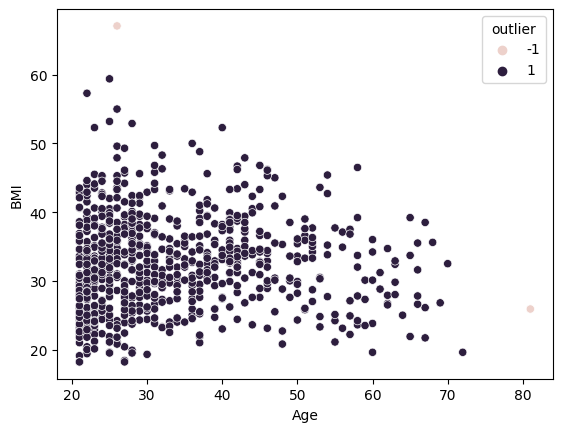

In [35]:
sns.scatterplot(data = age_bmi_outliers, x = 'Age', y = 'BMI', hue = 'outlier')

In [36]:
# Compute OPTICS
optics_bmi = OPTICS(max_eps = np.inf).fit(age_bmi)
labels = optics_bmi.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 60
Estimated no. of noise points: 296


/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60500/2228470770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_optics['labels'] = labels.tolist()
/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60500/2228470770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_optics['labels'][i] = 1


<AxesSubplot: xlabel='Age', ylabel='BMI'>

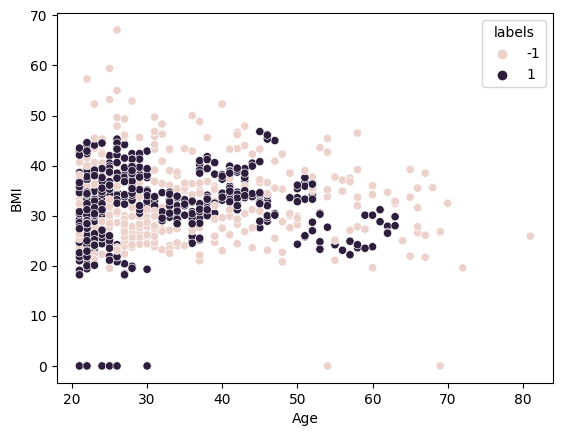

In [37]:
bmi_optics = age_bmi
bmi_optics['labels'] = labels.tolist()

for i in range(0, len(bmi_optics['labels'])):
    if bmi_optics['labels'][i] != -1:
               bmi_optics['labels'][i] = 1

sns.scatterplot(data = bmi_optics, x = 'Age', y = 'BMI', hue = 'labels')

## Dataframe 2:

In [38]:
height_df

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54
...,...,...,...,...,...,...
194,195,Mozambique,164.30,155.42,5.39,5.10
195,196,Papua New Guinea,163.10,156.89,5.35,5.15
196,197,Solomon Islands,163.07,156.79,5.35,5.14
197,198,Laos,162.78,153.10,5.34,5.02


<AxesSubplot: xlabel='Male Height in Cm', ylabel='Female Height in Cm'>

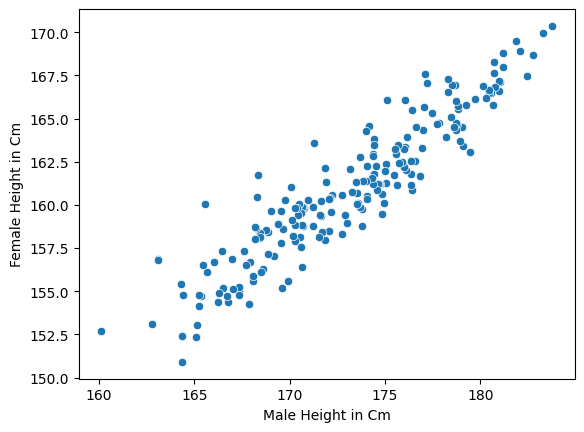

In [39]:
height = height_df[['Male Height in Cm', 'Female Height in Cm']]
sns.scatterplot(data = height, x = 'Male Height in Cm', y = 'Female Height in Cm')

In [40]:
minPits = 4
eps = 2
outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

height_df_clusters = outlier_detection.fit_predict(height)
list(height_df_clusters).count(-1)

2

**Using the defalt parameters two outliers could be found (possibly Timor-Leste with a height of 160cm)**

In [41]:
silhouette_func(height)

eps vaulue:2
For eps value =2 The average silhouette score is: 0.3043381867494064
eps vaulue:3
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive) Error thrown


Once the maximum of epsilon is reached, the function gets an error.

In [42]:
minPits = 3
eps = 2
outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

height_clusters = outlier_detection.fit_predict(height)
list(height_clusters).count(-1)

2

/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60500/936664201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_outliers['outlier'] = height_clusters.tolist()


<AxesSubplot: xlabel='Male Height in Cm', ylabel='Female Height in Cm'>

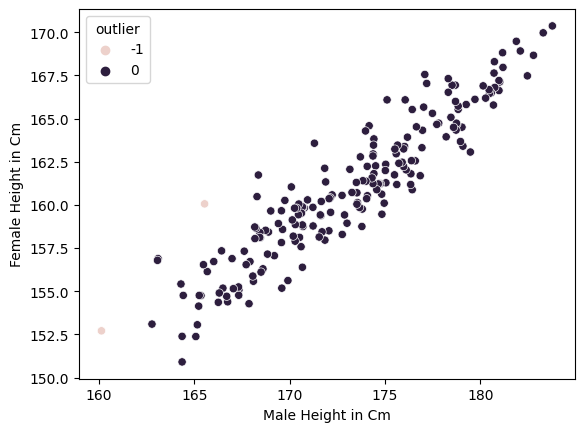

In [43]:
height_outliers = height
height_outliers['outlier'] = height_clusters.tolist()
sns.scatterplot(data = height_outliers, x = 'Male Height in Cm', y = 'Female Height in Cm', hue = 'outlier')

We can observe two outliers using the hyperparameters: minPits = 3, and eps = 2. Both outliers are compared to the other datapoints relatively large as females but small as males.

In [44]:
# Compute OPTICS
optics_weight = OPTICS(max_eps = np.inf).fit(height)
labels = optics_weight.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 11
Estimated no. of noise points: 108


/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60500/4207416779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_optics['labels'] = labels.tolist()
/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60500/4207416779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_optics['labels'][i] = 1


<AxesSubplot: xlabel='Male Height in Cm', ylabel='Female Height in Cm'>

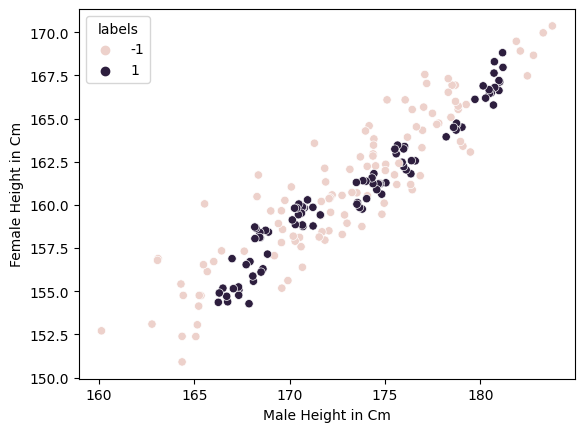

In [45]:
height_optics = height
height_optics['labels'] = labels.tolist()


for i in range(0, len(height_optics['labels'])):
    if height_optics['labels'][i] != -1:
               height_optics['labels'][i] = 1

sns.scatterplot(data = height_optics, x = 'Male Height in Cm', y = 'Female Height in Cm', hue = 'labels')

## Dataframe 3:

In [46]:
weight_df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [47]:
weight = weight_df[['Height(Inches)', 'Weight(Pounds)']]
weight

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


<AxesSubplot: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

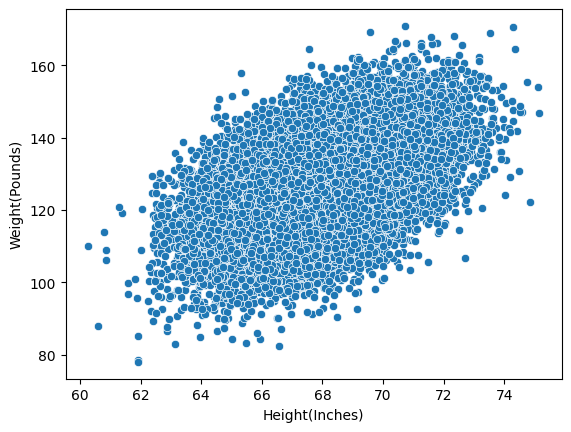

In [48]:
sns.scatterplot(data = weight, x = 'Height(Inches)', y = 'Weight(Pounds)')

In [49]:
minPits = 4
eps = 2
outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

weight_df_clusters = outlier_detection.fit_predict(weight)
list(weight_df_clusters).count(-1)

7

In [50]:
silhouette_func(weight)

eps vaulue:2
For eps value =2 The average silhouette score is: 0.6615029724541163
eps vaulue:3
For eps value =3 The average silhouette score is: 0.7112660063315617
eps vaulue:4
For eps value =4 The average silhouette score is: 0.6981720839140657
eps vaulue:5
For eps value =5 The average silhouette score is: 0.6999404876537011
eps vaulue:6
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive) Error thrown


In [51]:
minPits = 4
eps = 3
outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

weight_clusters = outlier_detection.fit_predict(weight)
list(weight_clusters).count(-1)

0

/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60500/2968572086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight_outliers['outlier'][i] = 1


<AxesSubplot: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

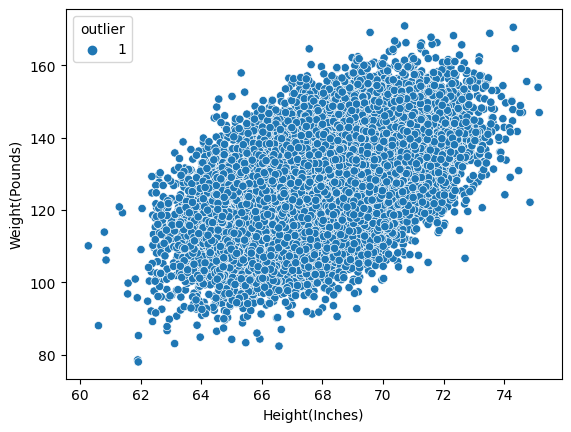

In [52]:
weight_outliers = weight
weight_outliers['outlier'] = weight_clusters.tolist()
for i in range(0, len(weight_outliers['outlier'])):
    if weight_outliers['outlier'][i] != -1:
               weight_outliers['outlier'][i] = 1
sns.scatterplot(data = weight_outliers, x = 'Height(Inches)', y = 'Weight(Pounds)', hue = 'outlier')

In [53]:
# Compute OPTICS
optics_weight = OPTICS(max_eps = np.inf).fit(weight)
labels = optics_weight.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 1589
Estimated no. of noise points: 12116


/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60500/1569700590.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight_optics['labels'][i] = 1


<AxesSubplot: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

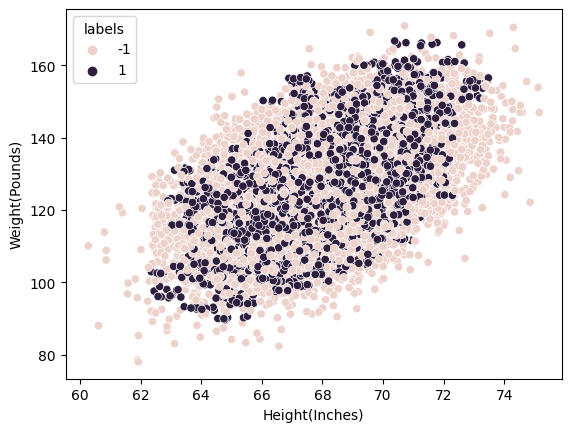

In [54]:
weight_optics = weight
weight_optics['labels'] = labels.tolist()

for i in range(0, len(weight_optics['labels'])):
    if weight_optics['labels'][i] != -1:
               weight_optics['labels'][i] = 1

sns.scatterplot(data = weight_optics, x = 'Height(Inches)', y = 'Weight(Pounds)', hue = 'labels')

**6.** describe your findings and interpret the results

Summarizing, the DBScan algorithm worked very good for finding anomalies inside the datasets. Based on the silhouette score, the best amount of clusters could be determined. The minPits parameter was assumed by using the dimensions*2  or dimenstions+1 rule.

For dataset one, DBScan found four outliers and two clusters. After preprocessing the data and removing the BMI = 0 values, DBScan found two outliers resulting in a better outlier detection. 

For dataset two, DBScan detected two outliers. These consisted of the country with the smallest population and a  country which has comparably large females but small males.

For the final dataset, DBScan detected no outliers. However, when analyzing the scatter plot, many possible outliers can be detected, especially when considering 25000 datapoints are included.

Using the OPTICS algorithm mentioned in the Stackexchange article did not work out at all. For every dataset the algorithm found too many clusters and thus many outliers. Either the hyperparameters have to be fine tuned or the datasets are not made for this algorithm.